<a href="https://colab.research.google.com/github/Light896cart/CV/blob/main/Detection/Image_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from torch.utils.data import Dataset, DataLoader
from torchvision import models
import torch
import torch.nn as nn
from torchvision import transforms
import torch.optim as optim

import os
import xml.etree.ElementTree as ET
from PIL import Image

import matplotlib.pyplot as plt


In [ ]:
class DataFurcts(Dataset):
  def __init__(self,path,transform):
    self.path = path
    self.transform = transform

    xml_files = [xml_files for xml_files in os.listdir(path) if xml_files.endswith('.xml')]
    self.dataset = list(self._XML_data(xml_files,path))  # Изменено на список
    print(self.dataset)

  def __getitem__(self, idx):
    sample = self.dataset[idx]['filename']
    img = Image.open(f'{self.path}/{sample}').convert('RGB')

    if self.transform:
      img = self.transform(img)


    # Получаем размеры изображения для нормализации
    width, height = img.shape[1:3]
    if self.dataset[idx]['label'] == 'orange':
      label = torch.tensor([1,0,0,0], dtype=torch.float)
    elif self.dataset[idx]['label'] == 'apple':
      label = torch.tensor([0,1,0,0], dtype=torch.float)
    elif self.dataset[idx]['label'] == 'banana':
      label = torch.tensor([0,0,1,0], dtype=torch.float)
    else:
      label = torch.tensor([0,0,0,1], dtype=torch.float)

    # Нормализуем координаты
    bndbox = self.dataset[idx]['bndbox']
    normalized_bndbox = {
        'xmin': bndbox['xmin'] / width,
        'ymin': bndbox['ymin'] / height,
        'xmax': bndbox['xmax'] / width,
        'ymax': bndbox['ymax'] / height,
    }

    return img, normalized_bndbox, label


  def __len__(self):
    return len(self.dataset)

  def _XML_data(self, xml_files, path):
    for file in xml_files:
        try:
            # Загрузка и парсинг XML файла
            tree = ET.parse(os.path.join(path, file))
            root = tree.getroot()

            # Извлечение данных
            filename = root.find('filename').text
            label = root.find('./object/name').text

            # Извлечение координат из bndbox
            bndbox = root.find('./object/bndbox')
            if bndbox is None:
                continue  # Переход к следующему файлу, если bndbox отсутствует

            xmin = float(bndbox.find('xmin').text)
            ymin = float(bndbox.find('ymin').text)
            xmax = float(bndbox.find('xmax').text)
            ymax = float(bndbox.find('ymax').text)

            yield {'filename': filename, 'label': label, 'bndbox': {'xmin':torch.tensor(xmin), 'ymin': torch.tensor(ymin), 'xmax': torch.tensor(xmax), 'ymax': torch.tensor(ymax)}}
        except Exception as e:
                print(f"Ошибка {file}: {e}")

In [ ]:
transform = transforms.Compose([
            transforms.ToTensor(),  # Преобразует изображение в тензор
            transforms.Resize((256,256)),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
            # Вы можете добавить другие трансформации, если это необходимо
        ])

In [ ]:
path = '/content/fructs/train_zip/train'
daset = DataFurcts(path,transform)
train_data = DataLoader(daset,batch_size=32,shuffle=True)

[{'filename': 'orange_46.jpg', 'label': 'orange', 'bndbox': {'xmin': tensor(62.), 'ymin': tensor(77.), 'xmax': tensor(245.), 'ymax': tensor(267.)}}, {'filename': 'mixed_6.jpg', 'label': 'orange', 'bndbox': {'xmin': tensor(38.), 'ymin': tensor(9.), 'xmax': tensor(184.), 'ymax': tensor(152.)}}, {'filename': 'orange_53.jpg', 'label': 'orange', 'bndbox': {'xmin': tensor(324.), 'ymin': tensor(291.), 'xmax': tensor(692.), 'ymax': tensor(680.)}}, {'filename': 'orange_58.jpg', 'label': 'orange', 'bndbox': {'xmin': tensor(38.), 'ymin': tensor(1.), 'xmax': tensor(345.), 'ymax': tensor(299.)}}, {'filename': 'mixed_19.jpg', 'label': 'orange', 'bndbox': {'xmin': tensor(4.), 'ymin': tensor(159.), 'xmax': tensor(86.), 'ymax': tensor(247.)}}, {'filename': 'apple_58.jpg', 'label': 'apple', 'bndbox': {'xmin': tensor(167.), 'ymin': tensor(334.), 'xmax': tensor(651.), 'ymax': tensor(810.)}}, {'filename': 'apple_62.jpg', 'label': 'apple', 'bndbox': {'xmin': tensor(97.), 'ymin': tensor(62.), 'xmax': tensor(

In [ ]:
for img, info,label in daset:
  print(label)
  # xmin = int(info['bndbox']['xmin'])
  # ymin = int(info['bndbox']['ymin'])
  # xmax = int(info['bndbox']['xmax'])
  # ymax = int(info['bndbox']['ymax'])

  # # Отображаем изображение
  # plt.imshow(img)
  # # Добавляем квадратик (прямоугольник)
  # plt.gca().add_patch(plt.Rectangle((xmin, ymin),
  #                                     xmax - xmin,
  #                                     ymax - ymin,
  #                                     linewidth=2, edgecolor='red', facecolor='none'))

  # # Показываем изображение с добавленным квадратиком
  # plt.axis('off')  # Отключаем оси для более чистого отображения
  # plt.show()


tensor([1, 0, 0, 0])
tensor([1, 0, 0, 0])
tensor([1, 0, 0, 0])
tensor([1, 0, 0, 0])
tensor([1, 0, 0, 0])
tensor([0, 1, 0, 0])
tensor([0, 1, 0, 0])
tensor([0, 0, 1, 0])
tensor([0, 0, 1, 0])
tensor([0, 0, 1, 0])
tensor([1, 0, 0, 0])
tensor([0, 0, 1, 0])
tensor([0, 1, 0, 0])
tensor([0, 1, 0, 0])
tensor([0, 1, 0, 0])
tensor([1, 0, 0, 0])
tensor([0, 0, 1, 0])
tensor([1, 0, 0, 0])
tensor([0, 0, 1, 0])
tensor([0, 0, 1, 0])
tensor([0, 0, 1, 0])
tensor([1, 0, 0, 0])
tensor([1, 0, 0, 0])
tensor([0, 1, 0, 0])
tensor([0, 1, 0, 0])
tensor([1, 0, 0, 0])
tensor([0, 0, 1, 0])
tensor([0, 1, 0, 0])
tensor([0, 0, 1, 0])
tensor([0, 1, 0, 0])
tensor([1, 0, 0, 0])
tensor([0, 0, 1, 0])
tensor([1, 0, 0, 0])
tensor([1, 0, 0, 0])
tensor([0, 1, 0, 0])
tensor([1, 0, 0, 0])
tensor([0, 0, 1, 0])
tensor([1, 0, 0, 0])
tensor([1, 0, 0, 0])
tensor([0, 1, 0, 0])
tensor([0, 0, 1, 0])
tensor([0, 0, 1, 0])
tensor([1, 0, 0, 0])
tensor([0, 1, 0, 0])
tensor([0, 0, 1, 0])
tensor([1, 0, 0, 0])
tensor([0, 1, 0, 0])
tensor([0, 1,

KeyboardInterrupt: 

In [ ]:
class ObjectDetectionModel(nn.Module):
    def __init__(self):
        super(ObjectDetectionModel, self).__init__()
        self.base_model = models.resnet50(pretrained=False)
        num_features = self.base_model.fc.in_features

        # Убираем последний слой ResNet
        self.base_model.fc = nn.Identity()

        # Общий слой для обработки признаков
        self.shared_layer = nn.Sequential(
            nn.Linear(num_features, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU()
        )

        # Новый линейный слой для регрессии (4 значения)
        self.regression_layer = nn.Linear(256, 4)

        # Новый линейный слой для классификации (число классов)
        self.classification_layer = nn.Linear(256, 4)  # Например, 4 класса

    def forward(self, x):
        features = self.base_model(x)  # Получаем признаки из ResNet

        # Пропускаем через общий слой
        shared_features = self.shared_layer(features)

        # Предсказания координат и классов
        box_predictions = self.regression_layer(shared_features)
        class_predictions = self.classification_layer(shared_features)

        return box_predictions, class_predictions

# Пример создания модели
model = ObjectDetectionModel()

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [ ]:
box_criterion = nn.MSELoss()
classed = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=0.0001)

In [ ]:
model.train()
for _ in range(100):
  for img,info,label in train_data:
    optimizer.zero_grad()  # Обнуляем градиен
    box = torch.stack(list(info.values()), dim=1)

    box_predictions, class_predictions = model(img)

    box_loss = box_criterion(box_predictions,box)
    print(box_loss)
    class_loss = classed(class_predictions,label)
    print(class_loss)

    loss = box_loss + class_loss

    loss.backward()  # Обратный проход (вычисление градиентов)
    optimizer.step()  # Обновление параметров модели
    print(loss.item())

    if loss.item() < 0.6:
      break
  if loss.item() < 0.6:
    break


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


tensor(6.4231, grad_fn=<MseLossBackward0>)
tensor(1.4168, grad_fn=<DivBackward1>)
7.8398871421813965
tensor(3.8865, grad_fn=<MseLossBackward0>)
tensor(1.4311, grad_fn=<DivBackward1>)
5.317583084106445
tensor(1.6830, grad_fn=<MseLossBackward0>)
tensor(1.3615, grad_fn=<DivBackward1>)
3.044489860534668
tensor(2.0679, grad_fn=<MseLossBackward0>)
tensor(1.3529, grad_fn=<DivBackward1>)
3.4208180904388428
tensor(2.7768, grad_fn=<MseLossBackward0>)
tensor(1.2995, grad_fn=<DivBackward1>)
4.076272964477539
tensor(3.2142, grad_fn=<MseLossBackward0>)
tensor(1.2638, grad_fn=<DivBackward1>)
4.477957248687744
tensor(1.9157, grad_fn=<MseLossBackward0>)
tensor(1.1790, grad_fn=<DivBackward1>)
3.094686985015869
tensor(0.6521, grad_fn=<MseLossBackward0>)
tensor(1.2314, grad_fn=<DivBackward1>)
1.8835172653198242
tensor(3.1107, grad_fn=<MseLossBackward0>)
tensor(1.2137, grad_fn=<DivBackward1>)
4.324389457702637
tensor(2.2637, grad_fn=<MseLossBackward0>)
tensor(1.1668, grad_fn=<DivBackward1>)
3.4305157661437

KeyboardInterrupt: 

torch.Size([1, 3, 256, 256])
tensor([[ 63.4358, 105.5122, 426.5801, 365.5325]])
tensor(63.4358)
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7CCB99ADFE50>


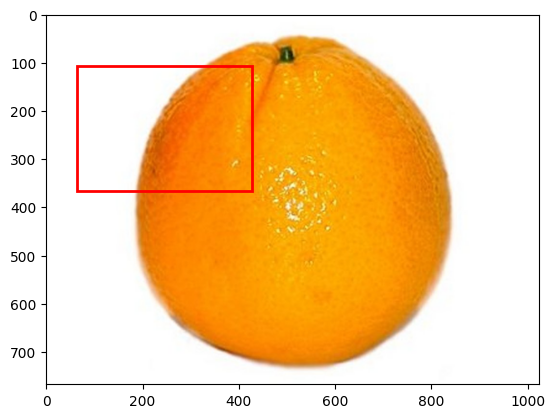

In [ ]:
model.eval()
imger = '/content/fructs/train_zip/train/orange_73.jpg'
imgr = Image.open(imger)
imger = transform(imgr).unsqueeze(0)
print(imger.shape)
with torch.no_grad():
  box_predictions, class_predictions = model(imger)
  box_predictions = box_predictions*256
  print(box_predictions)
  print(box_predictions[0][0])

plt.gca().add_patch(plt.Rectangle((box_predictions[0][0], box_predictions[0][1]),
                                      box_predictions[0][2] - box_predictions[0][0],
                                      box_predictions[0][3] - box_predictions[0][1],
                                      linewidth=2, edgecolor='red', facecolor='none'))

print(imgr)
plt.imshow(imgr)
plt.show()

In [ ]:
zero = torch.zeros(4)

print(zero)

tensor([0., 0., 0., 0.])
